<a href="https://colab.research.google.com/github/apriarami789/Deep_Learning/blob/main/AnalisisSentiment_Mhd_ApriArami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentiment : Produk Smartphone Samsung Galaxy S Series
by : Mhd. Apri Arami

## Install and Import Library

In [1]:
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.6 MB/s eta 0:00:00


In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import re
import string
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from io import StringIO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras import regularizers

## Import Data and Pre-Processing Data

In [4]:
!git clone https://github.com/apriarami789/Deep_Learning.git

Cloning into 'Deep_Learning'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 1.95 MiB | 3.77 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [5]:
df = pd.read_csv('Deep_Learning/youtube_12000_comments.csv')
df.head(10)

,video_id,author,comment,likeCount,publishedAt
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z
5,dp6PogzQWiQ,@SyaRoniSr,Saya ada s21 ultra 512gb dulu beli harga 20jt+...,1,2025-04-18T01:40:11Z
6,dp6PogzQWiQ,@ahmadblora1981,Kalau 2025 masih wort it gak kak s21 ultra,1,2025-04-09T11:25:23Z
7,dp6PogzQWiQ,@mafsaja1263,Baru kesampaian beli s21 ultra di 2025 ini dg ...,1,2025-04-08T11:35:24Z
8,dp6PogzQWiQ,@jafitriayup9664,2025,0,2025-04-02T07:46:43Z
9,dp6PogzQWiQ,@rizalpratama6775,Di pakai 2025 masih oke gak ya ?,0,2025-03-14T14:16:01Z


In [6]:
# informasi setiap kolom dan deteksi nilai nan pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     17711 non-null  object
 1   author       17709 non-null  object
 2   comment      17711 non-null  object
 3   likeCount    17711 non-null  int64 
 4   publishedAt  17711 non-null  object
dtypes: int64(1), object(4)
memory usage: 692.0+ KB


In [7]:
# melihat jumlah data yang duplikat
df.duplicated().sum()

np.int64(8)

In [8]:
# menghapus data yang terduplikat
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17703 entries, 0 to 17702
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     17703 non-null  object
 1   author       17701 non-null  object
 2   comment      17703 non-null  object
 3   likeCount    17703 non-null  int64 
 4   publishedAt  17703 non-null  object
dtypes: int64(1), object(4)
memory usage: 691.7+ KB


In [9]:
# menghapus kolom yang nan
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17701 entries, 0 to 17702
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     17701 non-null  object
 1   author       17701 non-null  object
 2   comment      17701 non-null  object
 3   likeCount    17701 non-null  int64 
 4   publishedAt  17701 non-null  object
dtypes: int64(1), object(4)
memory usage: 829.7+ KB


In [10]:
# view data berdasarkan jumlah like
df_sorted_likes = df.sort_values(by='likeCount', ascending=False)
df_sorted_likes.head(5) # Print top 5 rows to see the result

,video_id,author,comment,likeCount,publishedAt
13226,8k6zfbyxYmg,@richiez_98,S24 ultra : top off the line\nS24 + : flagship...,2343,2024-10-03T11:05:07Z
14656,-ZzoJL1MD5g,@kucingbeelanggaming1174,TANPA CHARGER!... TANPA CHARGER!... TANPA CHAR...,893,2023-10-04T06:36:30Z
4939,EM9ls_wTB9w,@nihongomantappu,Lagi nonton kaget tiba-tiba ada ig aku wkwkwkk...,807,2024-01-19T11:49:01Z
8080,zTDsP2P_Qfk,@njrascal,"Tahun lalu, nonton review ini sambil mikir, gi...",591,2024-08-10T05:59:11Z
14692,-ZzoJL1MD5g,@ivanchristianto22,"Kalo menurut gw, nih hp bukan mirip ke S23 ser...",540,2023-10-04T05:52:40Z


## Pre-Processing text

### Filtering and Casefolding

In [11]:
# fungsi untuk pra-processing text
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # menghapus selain huruf latin, angka dan whitespace

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

In [12]:
%%time
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['comment'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

CPU times: user 462 ms, sys: 6.08 ms, total: 468 ms
Wall time: 801 ms


In [13]:
df.head(5)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton


### Slang Word Fixed

In [14]:
# Memanggil kamus colloquial-indonesian-lexicon.csv dari GitHub
url_lexicon = "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"
response_lexicon = requests.get(url_lexicon)

if response_lexicon.status_code != 200:
    raise RuntimeError(f"Error: gagal mengunduh lexicon (status code {response_lexicon.status_code})")

# Membaca konten CSV ke dalam DataFrame menggunakan StringIO
lexicon_content = response_lexicon.text
df_alay = pd.read_csv(StringIO(lexicon_content))

# Menampilkan DataFrame lexicon
print(len(df_alay))
df_alay.head(5)

15006


,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [15]:
# beberapa slang/typo yang terdeteksi pada data
file_path = 'Deep_Learning/slang_typo_full_mapping.txt'
df_slang = pd.read_csv(file_path, sep='\t', header=0)
display(df_slang.head())
display(df_slang.info())

,original,normalized
0,aja,saja
1,banget,sangat
2,beliin,membelikan
3,bgt,banget
4,bikin,membuat


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   original    164 non-null    object
 1   normalized  163 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


None

In [16]:
# slangword tambahan
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih",
              "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "yg": "yang","review":"ulasan","pake":"pakai","kalo":"kalau",
              "mending":"lebih baik","banget":"sekali","gw":"saya","om":"paman",
              "mo":"mau","kalaw":"kalau","hp":"handphone","wort":"worth",
              "enggak":"tidak","nabung":"tabung"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        elif word.lower() in df_alay['slang'].values:
            alay_word = df_alay[df_alay['slang'] == word.lower()]['formal'].values[0]
            fixed_words.append(alay_word)
        elif word.lower() in df_slang['original'].values:
            typo_word = df_slang[df_slang['original'] == word.lower()]['normalized'].values[0]
            fixed_words.append(typo_word)
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
# applying in df
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_slangwords'] = df['text_slangwords'].apply(fix_slangwords)
df.head(5)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg,harganya berapa ya sekarang
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton,menonton


In [18]:
# Mneghitung jumlah kata dan frekuensinya dalam kolom komentar

# Combine all text from the 'comment' column into a single string
all_comments_text = ' '.join(df['comment'].astype(str).tolist())

# Tokenize the text into words
words = word_tokenize(all_comments_text)

# Count the frequency of each word
word_counts = Counter(words)

# Create a list of dictionaries for the CSV output
corpus_data = [{'word': word, 'frequency': count} for word, count in word_counts.items()]

# Convert the list of dictionaries to a DataFrame
corpus_df = pd.DataFrame(corpus_data)

# Sort the DataFrame by frequency in descending order
corpus_df = corpus_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Export the DataFrame to a CSV file
corpus_df.to_csv('comment_corpus_and_frequency.csv', index=False)

print("Corpus and frequencies exported to comment_corpus_and_frequency.csv")
corpus_df.head(5) # Display the head of the corpus dataframe


Corpus and frequencies exported to comment_corpus_and_frequency.csv


,word,frequency
0,",",8163
1,.,4344
2,?,3697
3,di,3313
4,yg,2577


### Steaming Text

In [19]:
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Membuat list word dari tokenize sebelumnya
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

In [20]:
# Mengubah kata berimbuhan menjadi kata dasar
df['text_steaming'] = df['text_slangwords'].apply(stemmingText)

df.head(5)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg,harganya berapa ya sekarang,harga berapa ya sekarang
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton,menonton,tonton


### tokenizing

In [21]:
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

In [22]:
# Mengtokenize kata
df['text_tokenizingText'] = df['text_steaming'].apply(tokenizingText)

df.head(5)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg,harganya berapa ya sekarang,harga berapa ya sekarang,"[harga, berapa, ya, sekarang]"
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya,"[harga, handphone, ini, berapa, ya]"
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...,"[ada, yang, jual, second, di, shopee, juta, wo..."
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...,"[sih, apa, a, pusing, mau, beli, yang, mana, b..."
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton,menonton,tonton,[tonton]


### Stopwords Text

In [23]:
# list stopwords dari sastrawi
stop_factory = StopWordRemoverFactory().get_stop_words() # load default stopword
stop_factory = pd.Series(stop_factory)
stop_factory.head(5)

,0
0,a
1,ada
2,adalah
3,adanya
4,adapun


In [24]:
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords_eng = set(stopwords.words('english'))
    listStopwords.update(listStopwords_eng)      # menghapus stopwords dalam bahasa inggris
    listStopwords.update(stop_factory[0])        # menambahkan stopwords dari sastrawi

    # penambahan stopwords yang dibuat sendiri
    listStopwords.update(["iya","yaa","gak","nya","na","sih","ku","di","ga",
                          "ya","gaa","loh","kah","woi","woii","woy","banget",
                          "kayaknya","gitu","dong","aja","sih","deh","mah","lah",
                          "weh"])

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [25]:
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

df.head(5)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText,text_stopword
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg,harganya berapa ya sekarang,harga berapa ya sekarang,"[harga, berapa, ya, sekarang]",[harga]
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya,"[harga, handphone, ini, berapa, ya]","[harga, handphone]"
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...,"[ada, yang, jual, second, di, shopee, juta, wo...","[jual, second, shopee, juta, wor, bang]"
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...,"[sih, apa, a, pusing, mau, beli, yang, mana, b...","[pusing, beli, bantu, kak]"
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton,menonton,tonton,[tonton],[tonton]


### Text akhir

In [26]:
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [27]:
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

df.head(5)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText,text_stopword,text_akhir
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg,harganya berapa ya sekarang,harga berapa ya sekarang,"[harga, berapa, ya, sekarang]",[harga],harga
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya,"[harga, handphone, ini, berapa, ya]","[harga, handphone]",harga handphone
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...,"[ada, yang, jual, second, di, shopee, juta, wo...","[jual, second, shopee, juta, wor, bang]",jual second shopee juta wor bang
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...,"[sih, apa, a, pusing, mau, beli, yang, mana, b...","[pusing, beli, bantu, kak]",pusing beli bantu kak
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton,menonton,tonton,[tonton],[tonton],tonton


### Remove one word ini one comment

Ini dilakukan karena kata tunggal tidak selamanya menggambarkan itu komentar yang mengacu pada sentimen

In [28]:
df['last_n_words'] = df['text_akhir'].apply(lambda x: len(x.split()))
df.head(10)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText,text_stopword,text_akhir,last_n_words
0,dp6PogzQWiQ,@itsvladilena,2025 harganya brp ya skrg?,0,2025-06-07T05:33:40Z,harganya brp ya skrg,harganya brp ya skrg,harganya berapa ya sekarang,harga berapa ya sekarang,"[harga, berapa, ya, sekarang]",[harga],harga,1
1,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya,"[harga, handphone, ini, berapa, ya]","[harga, handphone]",harga handphone,2
2,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...,"[ada, yang, jual, second, di, shopee, juta, wo...","[jual, second, shopee, juta, wor, bang]",jual second shopee juta wor bang,6
3,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...,"[sih, apa, a, pusing, mau, beli, yang, mana, b...","[pusing, beli, bantu, kak]",pusing beli bantu kak,4
4,dp6PogzQWiQ,@alexanderanaokilaga5991,Nonton 2025😅😅,0,2025-05-02T05:07:23Z,Nonton,nonton,menonton,tonton,[tonton],[tonton],tonton,1
5,dp6PogzQWiQ,@SyaRoniSr,Saya ada s21 ultra 512gb dulu beli harga 20jt+...,1,2025-04-18T01:40:11Z,Saya ada s ultra gb dulu beli harga jt Mau jua...,saya ada s ultra gb dulu beli harga jt mau jua...,saya ada sih ultra gb dulu beli harga juta mau...,saya ada sih ultra gb dulu beli harga juta mau...,"[saya, ada, sih, ultra, gb, dulu, beli, harga,...","[ultra, gb, beli, harga, juta, jual, terjun, b...",ultra gb beli harga juta jual terjun bebas bar...,21
6,dp6PogzQWiQ,@ahmadblora1981,Kalau 2025 masih wort it gak kak s21 ultra,1,2025-04-09T11:25:23Z,Kalau masih wort it gak kak s ultra,kalau masih wort it gak kak s ultra,kalau masih worth itu tidak kak sih ultra,kalau masih worth itu tidak kak sih ultra,"[kalau, masih, worth, itu, tidak, kak, sih, ul...","[worth, kak, ultra]",worth kak ultra,3
7,dp6PogzQWiQ,@mafsaja1263,Baru kesampaian beli s21 ultra di 2025 ini dg ...,1,2025-04-08T11:35:24Z,Baru kesampaian beli s ultra di ini dg harga ...,baru kesampaian beli s ultra di ini dg harga ...,baru kesampaian beli sih ultra di ini dengan h...,baru sampai beli sih ultra di ini dengan harga...,"[baru, sampai, beli, sih, ultra, di, ini, deng...","[beli, ultra, harga, jta]",beli ultra harga jta,4
8,dp6PogzQWiQ,@jafitriayup9664,2025,0,2025-04-02T07:46:43Z,,,,,[],[],,0
9,dp6PogzQWiQ,@rizalpratama6775,Di pakai 2025 masih oke gak ya ?,0,2025-03-14T14:16:01Z,Di pakai masih oke gak ya,di pakai masih oke gak ya,di pakai masih oke tidak ya,di pakai masih oke tidak ya,"[di, pakai, masih, oke, tidak, ya]","[pakai, oke]",pakai oke,2


In [29]:
# menghapus komentar dengan hasil last_n_words kurang dari 2
df = df[df['last_n_words'] >= 2]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16349 entries, 0 to 16348
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   video_id              16349 non-null  object
 1   author                16349 non-null  object
 2   comment               16349 non-null  object
 3   likeCount             16349 non-null  int64 
 4   publishedAt           16349 non-null  object
 5   text_clean            16349 non-null  object
 6   text_casefoldingText  16349 non-null  object
 7   text_slangwords       16349 non-null  object
 8   text_steaming         16349 non-null  object
 9   text_tokenizingText   16349 non-null  object
 10  text_stopword         16349 non-null  object
 11  text_akhir            16349 non-null  object
 12  last_n_words          16349 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.6+ MB


### Polarity Sentiment

In [30]:
# menggunakan sentiwordnet bahasa indonesia
!git clone https://github.com/onpilot/sentimen-bahasa.git

Cloning into 'sentimen-bahasa'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 114 (delta 18), reused 96 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 1.87 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [31]:
#path inset untuk kata-kata yang merujuk polarity positive atau negative
positive_path = '/content/sentimen-bahasa/leksikon/inset/positive.tsv'
negative_path = '/content/sentimen-bahasa/leksikon/inset/negative.tsv'

# Inset Sentiment
positive_inset = pd.read_csv(positive_path, sep='\t')
negative_inset = pd.read_csv(negative_path, sep='\t')

#path sentistrength_id
senti_word_path = '/content/sentimen-bahasa/leksikon/sentistrength_id/sentiwords_id.txt'

# sentistrenght
senti_word = pd.read_table(senti_word_path,header=None,sep=':',names=['word','value'])

In [32]:
# Lexicon Indonesia Sentiment

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [33]:
# fungsi membaca dokumen txt
def parse_markdown_table(filepath):
    """
    Parse file teks dengan format tabel markdown (menggunakan '|' sebagai delimiter)
    menjadi pandas DataFrame.

    Parameters:
        filepath (str): Path ke file .txt yang berisi tabel markdown.

    Returns:
        pd.DataFrame: DataFrame dengan isi tabel.
    """
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Ambil baris yang mengandung tanda '|' dan bukan baris separator (misalnya -----)
    table_lines = [line.strip() for line in lines if '|' in line and '-' not in line]

    # Ambil header dan data
    header = [col.strip() for col in table_lines[0].split('|') if col.strip()]
    data_rows = []

    for line in table_lines[1:]:
        row = [cell.strip() for cell in line.split('|') if cell.strip()]
        data_rows.append(row)

    # Buat DataFrame
    df = pd.DataFrame(data_rows, columns=header)
    return df

def clean_numeric_column(series):
    return (
        series.astype(str)
        #.str.replace(r'[^\d\-\+\.]', '', regex=True)  # hapus karakter selain digit, minus, plus, titik
        .str.replace('−', '-', regex=False)           # ganti minus simbol Unicode ke minus ASCII
        .str.strip()
        .replace('', '0')                             # jika kosong, jadikan 0 (opsional)
        .astype(float)                                # atau .astype(int) jika semua integer
    )

In [34]:
# lexicon sentimen dari Data Sendiri
# sentimen positive
pos = parse_markdown_table('Deep_Learning/custom_lexicon_sentimen/positive-text.txt')
pos['Bobot'] = pos['Bobot'].astype(float)

# sentimen negative
neg = parse_markdown_table('Deep_Learning/custom_lexicon_sentimen/negative-text.txt')
if 'Bobot' in neg.columns:
    neg['Bobot'] = clean_numeric_column(neg['Bobot'])

# sentimen netral
net = parse_markdown_table('Deep_Learning/custom_lexicon_sentimen/neutral-text.txt')
net['Bobot'] = net['Bobot'].astype(float)

In [35]:
# lexicon bahasa inggris
sia = SentimentIntensityAnalyzer()

def lexicon_eng(text):
  score = sia.polarity_scores(text)['compound']
  return score

def bigram_token(text):
  # Tokenisasi Bigram
  bigram_tokens = list(nltk.bigrams(text))
  # Mengubah format bigram dari tuple menjadi string "kata1 kata2"
  bigram_tokens_str = [" ".join(bigram) for bigram in bigram_tokens]
  return bigram_tokens_str

In [36]:
# fungsi untuk menentukan polaritas sentiment

def determine_sentiment_polarity(text):

    # Hitung skor sentimen menggunakan inset
    inset_score = 0
    for word in text:
        if word in positive_inset['word'].values:
            positive_score = positive_inset[positive_inset['word'] == word]['weight'].values[0]
            inset_score += positive_score
        elif word in negative_inset['word'].values:
            negative_score = negative_inset[negative_inset['word'] == word]['weight'].values[0]
            inset_score += negative_score

    # Hitung skor sentimen menggunakan sentistrength_id
    sentistrength_score = 0
    #for word in text:
        #if word in senti_word['word'].values:
            #sentistrength_score += senti_word[senti_word['word'] == word]['value'].values[0]

    # Hitung skor sentimen menggunakan custom lexicon
    lexicon_score = 0
    for word in text:
        if word in lexicon_positive:
            lexicon_score += lexicon_positive[word]
        elif word in lexicon_negative:
            lexicon_score += lexicon_negative[word]

    # Hitung skor sentimen menggunakan lexicon sendiri
    custome_score = 0
    #for word in text:
        #if word in pos['Kata'].values:
            #custome_score += pos[pos['Kata'] == word]['Bobot'].values[0]
        #elif word in neg['Kata'].values:
            #custome_score += neg[neg['Kata'] == word]['Bobot'].values[0]
        #elif word in net['Kata'].values:
            #custome_score += net[net['Kata'] == word]['Bobot'].values[0]
        #else:
            #custome_score += 0

    # Hitung skor sentimen untuk bahasa inggris, unigram
    unigram_score = 0
    for word in text:
        unigram_score += lexicon_eng(word)

    # Hitung skor sentimen untuk bahasa inggris, bigram
    bigram_score = 0
    list_word = bigram_token(text)
    for word in list_word:
        bigram_score += lexicon_eng(word)

    # total score lexicon bahasa inggris
    eng_score = unigram_score + bigram_score

    # Gabungkan skor dari ketiga sumber
    score = (inset_score + sentistrength_score + lexicon_score + custome_score)/2 + eng_score

    polarity=''
    # Inisialisasi variabel polaritas

    # Tentukan polaritas berdasarkan total skor
    if score > 0.1:
        polarity = 'positive'
    elif score < -0.1:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [37]:
%%time
results = df['text_stopword'].apply(determine_sentiment_polarity)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    9634
neutral     3527
negative    3188
Name: count, dtype: int64
CPU times: user 1min 14s, sys: 2.15 s, total: 1min 16s
Wall time: 1min 15s


<Axes: title={'center': 'Persentase Sentimen'}, ylabel='count'>

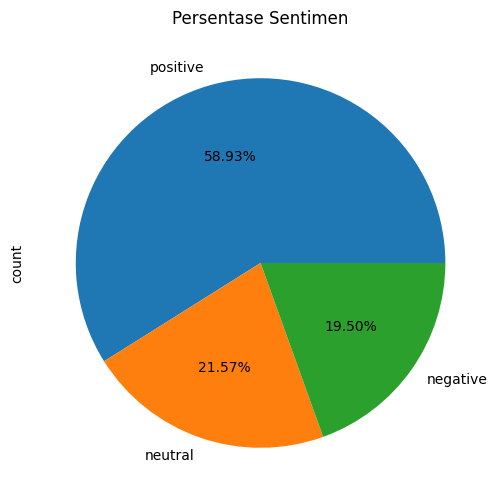

In [38]:
df['polarity'].value_counts().plot(kind='pie',autopct='%0.2f%%',figsize=(6, 6),
                                   title='Persentase Sentimen')

In [39]:
df.tail(10)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText,text_stopword,text_akhir,last_n_words,polarity_score,polarity
16339,u_Uy4p8H2aM,@kakaathallah9797,kalau gaming panas ga sama boros baterainya,0,2025-05-27T05:14:05Z,kalau gaming panas ga sama boros baterainya,kalau gaming panas ga sama boros baterainya,kalau gaming panas tidak sama boros baterainya,kalau gaming panas tidak sama boros baterai,"[kalau, gaming, panas, tidak, sama, boros, bat...","[gaming, panas, boros, baterai]",gaming panas boros baterai,4,-4.0,negative
16340,u_Uy4p8H2aM,@BroStyx,"Mantap, titip review Realme GT7 series,Ada in ...",0,2025-05-27T05:11:25Z,Mantap titip review Realme GT seriesAda in tes...,mantap titip review realme gt seriesada in tes...,mantap titip ulasan realme begitu seriesada in...,mantap titip ulas realme begitu seriesada ini ...,"[mantap, titip, ulas, realme, begitu, seriesad...","[mantap, titip, ulas, realme, seriesada, coba,...",mantap titip ulas realme seriesada coba game d...,9,9.0,positive
16341,u_Uy4p8H2aM,@AhmadRizal-nk2mi,masih setia di s23 plus sama s22 basic 😂😂😂,29,2025-05-27T05:10:44Z,masih setia di s plus sama s basic,masih setia di s plus sama s basic,masih setia di sih plus sama sih basic,masih setia di sih plus sama sih basic,"[masih, setia, di, sih, plus, sama, sih, basic]","[setia, plus, basic]",setia plus basic,3,-2.0,negative
16342,u_Uy4p8H2aM,@bakhRa-cg7xf,Poco f7 series mana review nya,0,2025-05-27T05:10:00Z,Poco f series mana review nya,poco f series mana review nya,poco f series mana ulasan nya,poco f series mana ulas nya,"[poco, f, series, mana, ulas, nya]","[poco, f, series, ulas]",poco f series ulas,4,0.0,neutral
16343,u_Uy4p8H2aM,@meme_mine1,Yang selalu nunggu reviewan Infinix note 50x,3,2025-05-27T05:08:58Z,Yang selalu nunggu reviewan Infinix note x,yang selalu nunggu reviewan infinix note x,yang selalu menunggu reviewan infinix note kali,yang selalu tunggu reviewan infinix note kali,"[yang, selalu, tunggu, reviewan, infinix, note...","[tunggu, reviewan, infinix, note, kali]",tunggu reviewan infinix note kali,5,1.0,positive
16344,u_Uy4p8H2aM,@wahyugilangprihatma9883,"Hp semahal ini, hasil vidio nya masih aja jitter""",12,2025-05-27T05:08:56Z,Hp semahal ini hasil vidio nya masih aja jitter,hp semahal ini hasil vidio nya masih aja jitter,handphone semahal ini hasil video nya masih sa...,handphone mahal ini hasil video nya masih saja...,"[handphone, mahal, ini, hasil, video, nya, mas...","[handphone, mahal, hasil, video, jitter]",handphone mahal hasil video jitter,5,4.0,positive
16345,u_Uy4p8H2aM,@haiqalnovel,GT 30 pro ... GT 30 pro ... GT 30 pro ... Plisss😅,8,2025-05-27T05:02:41Z,GT pro GT pro GT pro Plisss,gt pro gt pro gt pro plisss,begitu pro begitu pro begitu pro plisss,begitu pro begitu pro begitu pro plisss,"[begitu, pro, begitu, pro, begitu, pro, plisss]","[pro, pro, pro, plisss]",pro pro pro plisss,4,0.0,neutral
16346,u_Uy4p8H2aM,@Nomey-f1e,Infinix gt 30 pro ny kapan,0,2025-05-27T04:59:59Z,Infinix gt pro ny kapan,infinix gt pro ny kapan,infinix begitu pro nya kapan,infinix begitu pro nya kapan,"[infinix, begitu, pro, nya, kapan]","[infinix, pro]",infinix pro,2,0.0,neutral
16347,u_Uy4p8H2aM,@dudunhamdullah5134,"#15, Mantap om Ded",0,2025-05-27T04:59:33Z,Mantap om Ded,mantap om ded,mantap paman ded,mantap paman ded,"[mantap, paman, ded]","[mantap, paman, ded]",mantap paman ded,3,5.0,positive
16348,u_Uy4p8H2aM,@maknyelengseng8020,selalu setia nonton aja beli kagak😅🥲,0,2025-05-27T04:59:25Z,selalu setia nonton aja beli kagak,selalu setia nonton aja beli kagak,selalu setia menonton saja beli kagak,selalu setia tonton saja beli kagak,"[selalu, setia, tonton, saja, beli, kagak]","[setia, tonton, beli, kagak]",setia tonton beli kagak,4,-9.0,negative


In [40]:
# labeling kolom polarity
label_mapping = {'neutral':0,'positive': 1,'negative': 2}
df['label'] = df['polarity'].map(label_mapping)
df.head(10)

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText,text_stopword,text_akhir,last_n_words,polarity_score,polarity,label
0,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya,"[harga, handphone, ini, berapa, ya]","[harga, handphone]",harga handphone,2,3.0000,positive,1
1,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...,"[ada, yang, jual, second, di, shopee, juta, wo...","[jual, second, shopee, juta, wor, bang]",jual second shopee juta wor bang,6,3.0000,positive,1
2,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...,"[sih, apa, a, pusing, mau, beli, yang, mana, b...","[pusing, beli, bantu, kak]",pusing beli bantu kak,4,1.0000,positive,1
3,dp6PogzQWiQ,@SyaRoniSr,Saya ada s21 ultra 512gb dulu beli harga 20jt+...,1,2025-04-18T01:40:11Z,Saya ada s ultra gb dulu beli harga jt Mau jua...,saya ada s ultra gb dulu beli harga jt mau jua...,saya ada sih ultra gb dulu beli harga juta mau...,saya ada sih ultra gb dulu beli harga juta mau...,"[saya, ada, sih, ultra, gb, dulu, beli, harga,...","[ultra, gb, beli, harga, juta, jual, terjun, b...",ultra gb beli harga juta jual terjun bebas bar...,21,14.0000,positive,1
4,dp6PogzQWiQ,@ahmadblora1981,Kalau 2025 masih wort it gak kak s21 ultra,1,2025-04-09T11:25:23Z,Kalau masih wort it gak kak s ultra,kalau masih wort it gak kak s ultra,kalau masih worth itu tidak kak sih ultra,kalau masih worth itu tidak kak sih ultra,"[kalau, masih, worth, itu, tidak, kak, sih, ul...","[worth, kak, ultra]",worth kak ultra,3,0.4526,positive,1
5,dp6PogzQWiQ,@mafsaja1263,Baru kesampaian beli s21 ultra di 2025 ini dg ...,1,2025-04-08T11:35:24Z,Baru kesampaian beli s ultra di ini dg harga ...,baru kesampaian beli s ultra di ini dg harga ...,baru kesampaian beli sih ultra di ini dengan h...,baru sampai beli sih ultra di ini dengan harga...,"[baru, sampai, beli, sih, ultra, di, ini, deng...","[beli, ultra, harga, jta]",beli ultra harga jta,4,5.0000,positive,1
6,dp6PogzQWiQ,@rizalpratama6775,Di pakai 2025 masih oke gak ya ?,0,2025-03-14T14:16:01Z,Di pakai masih oke gak ya,di pakai masih oke gak ya,di pakai masih oke tidak ya,di pakai masih oke tidak ya,"[di, pakai, masih, oke, tidak, ya]","[pakai, oke]",pakai oke,2,2.0000,positive,1
7,dp6PogzQWiQ,@hendraferdiansyahakbar2027,disini ada kaha yg sudah pake samsung s21 ultr...,0,2025-03-12T07:30:59Z,disini ada kaha yg sudah pake samsung s ultra ...,disini ada kaha yg sudah pake samsung s ultra ...,disini ada kaha yang sudah pakai samsung sih u...,sini ada kaha yang sudah pakai samsung sih ult...,"[sini, ada, kaha, yang, sudah, pakai, samsung,...","[kaha, pakai, samsung, ultra, pakai, samsung, ...",kaha pakai samsung ultra pakai samsung ultra b...,20,12.0000,positive,1
8,dp6PogzQWiQ,@جونعبداللهالرشيد,"Gw merasa berat pas pake Note 8, lalu ganti S9...",1,2025-03-07T16:17:49Z,Gw merasa berat pas pake Note lalu ganti S Do...,gw merasa berat pas pake note lalu ganti s do...,saya merasa berat pas pakai note lalu ganti si...,saya rasa berat pas pakai note lalu ganti sih ...,"[saya, rasa, berat, pas, pakai, note, lalu, ga...","[berat, pas, pakai, note, ganti, agrade, ganti...",berat pas pakai note ganti agrade ganti sfe ga...,22,24.8880,positive,1
9,dp6PogzQWiQ,@tfdabc,"Kak mau tanya, apakah s pen pada s 21ultra bis...",1,2025-03-07T02:49:39Z,Kak mau tanya apakah s pen pada s ultra bisa s

### WordCloud

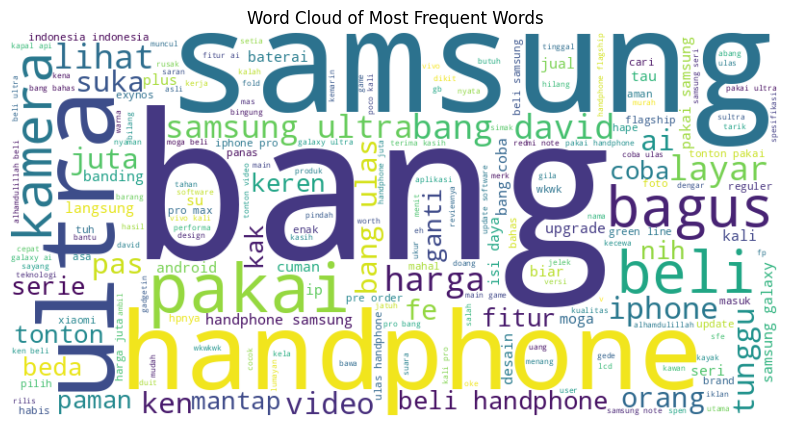

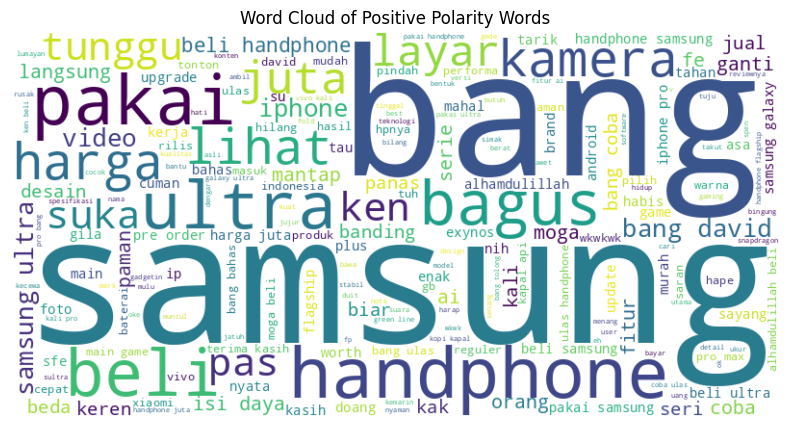

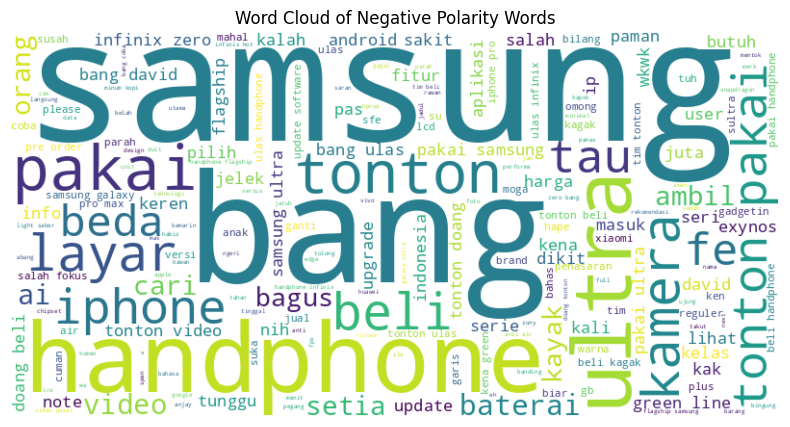

CPU times: user 4.21 s, sys: 152 ms, total: 4.37 s
Wall time: 4.38 s


In [41]:
%%time
# word cloud
# Gabungkan semua teks yang sudah dibersihkan menjadi satu string
all_words = ' '.join([text for text in df['text_akhir']])

# Buat WordCloud untuk kata-kata yang paling banyak muncul
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Tampilkan WordCloud untuk kata-kata yang paling banyak muncul
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Filter data untuk sentimen positif
positive_df = df[df['polarity'] == 'positive']
# Gabungkan teks positif menjadi satu string
positive_words = ' '.join([text for text in positive_df['text_akhir']])

# Buat WordCloud untuk kata-kata positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

# Tampilkan WordCloud untuk kata-kata positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Polarity Words')
plt.show()

# Filter data untuk sentimen negatif
negative_df = df[df['polarity'] == 'negative']
# Gabungkan teks negatif menjadi satu string
negative_words = ' '.join([text for text in negative_df['text_akhir']])

# Buat WordCloud untuk kata-kata negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Tampilkan WordCloud untuk kata-kata negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Polarity Words')
plt.show()

### Feature Extraction

In [42]:
# Melakukan oversampling agar data menjadi lebih uniform
def oversample_minority_classes(df, label_column='label', random_state=None):
    """
    Melakukan oversampling pada kelas minoritas dalam DataFrame untuk menyeimbangkan distribusi label.

    Args:
        df (pd.DataFrame): DataFrame input yang berisi data dan kolom label.
        label_column (str): Nama kolom yang berisi label/kelas.
        random_state (int, optional): Seed untuk pengacakan. Default None.

    Returns:
        pd.DataFrame: DataFrame yang telah di-oversampling dengan distribusi label yang lebih merata.
    """
    # Pisahkan fitur (X) dan target (y)
    X = df.drop(columns=[label_column])
    y = df[label_column]

    print("Distribusi label sebelum oversampling:")
    print(y.value_counts())

    # Inisialisasi RandomOverSampler
    ros = RandomOverSampler(random_state=random_state)

    # Lakukan oversampling
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Gabungkan kembali fitur dan target menjadi DataFrame baru
    df_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_oversampled[label_column] = y_resampled

    print("\nDistribusi label setelah oversampling:")
    print(df_oversampled[label_column].value_counts())

    return df_oversampled

# Contoh penggunaan fungsi oversampling pada DataFrame df_undersampled (hasil dari undersampling sebelumnya)
# Anda bisa mengganti ini dengan df jika ingin oversampling langsung dari data awal
df_oversampled = oversample_minority_classes(df, label_column='label', random_state=42)

# Tampilkan informasi DataFrame setelah oversampling
df_oversampled.info()
df_oversampled.head(5)


Distribusi label sebelum oversampling:
label
1    9634
0    3527
2    3188
Name: count, dtype: int64

Distribusi label setelah oversampling:
label
1    9634
2    9634
0    9634
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28902 entries, 0 to 28901
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              28902 non-null  object 
 1   author                28902 non-null  object 
 2   comment               28902 non-null  object 
 3   likeCount             28902 non-null  int64  
 4   publishedAt           28902 non-null  object 
 5   text_clean            28902 non-null  object 
 6   text_casefoldingText  28902 non-null  object 
 7   text_slangwords       28902 non-null  object 
 8   text_steaming         28902 non-null  object 
 9   text_tokenizingText   28902 non-null  object 
 10  text_stopword         28902 non-null  object 
 11  text_akhir          

,video_id,author,comment,likeCount,publishedAt,text_clean,text_casefoldingText,text_slangwords,text_steaming,text_tokenizingText,text_stopword,text_akhir,last_n_words,polarity_score,polarity,label
0,dp6PogzQWiQ,@sumiatisukiman3793,2025 harga hp ini brpa ya?,0,2025-05-18T06:38:08Z,harga hp ini brpa ya,harga hp ini brpa ya,harga handphone ini berapa ya,harga handphone ini berapa ya,"[harga, handphone, ini, berapa, ya]","[harga, handphone]",harga handphone,2,3.0000,positive,1
1,dp6PogzQWiQ,@dimassihotang6138,"Ada yang jual second di Shopee 5,5 jutaan. Wor...",0,2025-05-09T23:41:29Z,Ada yang jual second di Shopee jutaan Wor it ...,ada yang jual second di shopee jutaan wor it ...,ada yang jual second di shopee jutaan wor itu ...,ada yang jual second di shopee juta wor itu ti...,"[ada, yang, jual, second, di, shopee, juta, wo...","[jual, second, shopee, juta, wor, bang]",jual second shopee juta wor bang,6,3.0000,positive,1
2,dp6PogzQWiQ,@MelaKenis,S21 apa A55😢 pusing mau beli\nYang mana bantu ...,0,2025-05-08T05:31:41Z,S apa A pusing mau beli Yang mana bantu jawab kak,s apa a pusing mau beli yang mana bantu jawab kak,sih apa a pusing mau beli yang mana bantu jawa...,sih apa a pusing mau beli yang mana bantu jawa...,"[sih, apa, a, pusing, mau, beli, yang, mana, b...","[pusing, beli, bantu, kak]",pusing beli bantu kak,4,1.0000,positive,1
3,dp6PogzQWiQ,@SyaRoniSr,Saya ada s21 ultra 512gb dulu beli harga 20jt+...,1,2025-04-18T01:40:11Z,Saya ada s ultra gb dulu beli harga jt Mau jua...,saya ada s ultra gb dulu beli harga jt mau jua...,saya ada sih ultra gb dulu beli harga juta mau...,saya ada sih ultra gb dulu beli harga juta mau...,"[saya, ada, sih, ultra, gb, dulu, beli, harga,...","[ultra, gb, beli, harga, juta, jual, terjun, b...",ultra gb beli harga juta jual terjun bebas bar...,21,14.0000,positive,1
4,dp6PogzQWiQ,@ahmadblora1981,Kalau 2025 masih wort it gak kak s21 ultra,1,2025-04-09T11:25:23Z,Kalau masih wort it gak kak s ultra,kalau masih wort it gak kak s ultra,kalau masih worth itu tidak kak sih ultra,kalau masih worth itu tidak kak sih ultra,"[kalau, masih, worth, itu, tidak, kak, sih, ul...","[worth, kak, ultra]",worth kak ultra,3,0.4526,positive,1


In [43]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df['text_akhir']
y = df['label']

In [44]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df_oversampled['text_akhir']
y = df_oversampled['label']

In [45]:
# @title TF-IDF
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=10000, min_df=3, max_df=0.99,
                        use_idf=True,analyzer='word',smooth_idf=False,
                        sublinear_tf=False)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf  = train_test_split(X_tfidf, y, train_size=0.8, random_state=300)

# Menampilkan hasil ekstraksi fitur TF-IDF
features_df_tfidf

,aa,aa bang,aaahhhhh,abadi,abang,abang david,abang handphone,abang hasil,abang hehehe,abang khilaf,...,zoom nge,zoom smooth,zoom ulang,zoom zoom,zoomanowhlg,zoomanowhlg belah,zoomnya,zte,zte blade,ztr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
28898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
28899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.390814,0.0,0.0,0.0
28900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [46]:
features_df_tfidf.shape

(28902, 10000)

In [47]:
# @title Bag-of-Words (Bow)
# Ekstraksi fitur dengan Bag-of-Words
count_vectorizer = CountVectorizer(ngram_range=(1,2),analyzer='word',
                                   max_features=10000,max_df=0.99, min_df=3) # Anda bisa menyesuaikan parameter

X_bow = count_vectorizer.fit_transform(X)
X_bow = MaxAbsScaler().fit_transform(X_bow)   # karena nilai X_bow belum scaler dari 0 hingga 1

# Bagi data menjadi data latih dan data uji menggunakan Bag-of-Words
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, train_size=0.8, random_state=300)

# Konversi hasil ekstraksi fitur Bag-of-Words menjadi dataframe
features_df_bow = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur Bag-of-Words
features_df_bow

,aa,aa bang,aaahhhhh,abadi,abang,abang david,abang handphone,abang hasil,abang hehehe,abang khilaf,...,zoom nge,zoom smooth,zoom ulang,zoom zoom,zoomanowhlg,zoomanowhlg belah,zoomnya,zte,zte blade,ztr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
features_df_bow.shape

(28902, 10000)

### Training Model

#### TF-IDF

In [49]:
# seed untuk random generator
seed = 300

In [50]:
# @title Random Forest
%%time
# Membuat objek model Random Forest dengan TF-IDF
random_forest = RandomForestClassifier(n_estimators=200,criterion='gini',
                                       random_state=seed,class_weight='balanced',
                                       n_jobs=-1,max_features='sqrt')

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train_tfidf.toarray())
y_pred_test_rf = random_forest.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train_tfidf)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test_tfidf)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9977077116041694
Random Forest - accuracy_test: 0.9361702127659575
CPU times: user 13min 21s, sys: 4.34 s, total: 13min 26s
Wall time: 7min 41s


In [51]:
# @title Logistic Regression
%%time
# Membuat objek model LogisticRegression
lr = LogisticRegression(penalty='elasticnet',max_iter=1000,class_weight='balanced',
                        random_state=seed,solver='saga',n_jobs=-1,l1_ratio=0.5)

# Melatih model Logistic Regresion pada data pelatihan
lr.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = lr.predict(X_train_tfidf.toarray())
y_pred_test_lr = lr.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Logistic Regresion
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_tfidf)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_tfidf)

# Menampilkan akurasi
print('Logistic Regresion - accuracy_train:', accuracy_train_lr)
print('Logistic Regresion - accuracy_test:', accuracy_test_lr)

Logistic Regresion - accuracy_train: 0.9360321785389906
Logistic Regresion - accuracy_test: 0.8989794153260682
CPU times: user 5min 5s, sys: 2.09 s, total: 5min 7s
Wall time: 5min 6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Shape data latih TF-IDF setelah reshape: (23121, 1, 10000)
Shape data uji TF-IDF setelah reshape: (5781, 1, 10000)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │     5,186,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,196,483 (19.82 MB)

 Trainable params: 5,196,483 (19.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 28s 213ms/step - accuracy: 0.4041 - loss: 2.8228 - val_accuracy: 0.7317 - val_loss: 1.0035
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 38s 188ms/step - accuracy: 0.7916 - loss: 0.9143 - val_accuracy: 0.9036 - val_loss: 0.7217
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 23s 198ms/step - accuracy: 0.9259 - loss: 0.6644 - val_accuracy: 0.9293 - val_loss: 0.6788
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.9458 - loss: 0.6206 - val_accuracy: 0.9332 - val_loss: 0.6539
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step - accuracy: 0.9558 - loss: 0.5898 - val_accuracy: 0.9341 - val_loss: 0.6583
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.9590 - loss: 0.5776 - val_accuracy: 0.9400 - val_loss: 0.6135
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - accuracy: 0.9608 - loss: 0.5453 - val_accuracy: 0.9398 - val_loss: 0.6172
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 42s 204ms/step - accuracy: 0.9608 - loss: 0

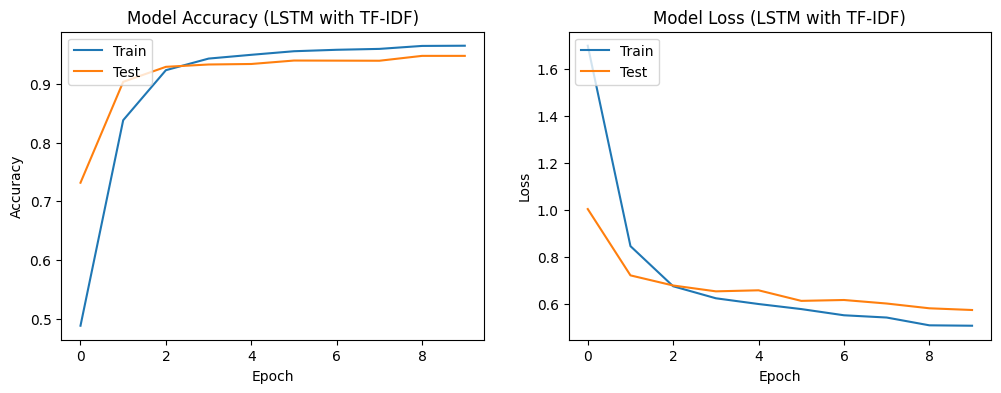

CPU times: user 6min 4s, sys: 27.4 s, total: 6min 31s
Wall time: 6min 6s


In [52]:
# @title LSTM
%%time
# Untuk TF-IDF, kita perlu mengubah matriks sparse menjadi array dense
# karena lapisan Embedding pada LSTM membutuhkan input array NumPy.
# Namun, perlu diingat bahwa ini bisa sangat memakan memori
# jika ukuran kosakata (max_features) dan jumlah data latih besar.

# Persiapan data untuk LSTM menggunakan TF-IDF
# Gunakan data hasil ekstraksi fitur TF-IDF (X_tfidf) dan label (y)
X_lstm_tfidf = X_tfidf # X_tfidf sudah di-fit dan transform sebelumnya
y_lstm_tfidf = y     # y sudah di-labeling sebelumnya

# Bagi data menjadi data latih dan data uji untuk LSTM
X_train_lstm_tfidf, X_test_lstm_tfidf, y_train_lstm_tfidf, y_test_lstm_tfidf = train_test_split(X_lstm_tfidf, y_lstm_tfidf, test_size=0.2, random_state=seed)

# Konversi matriks sparse TF-IDF ke array dense
# Ini adalah langkah kritis dan berpotensi memakan banyak memori
X_train_lstm_tfidf_dense = X_train_lstm_tfidf.toarray()
X_test_lstm_tfidf_dense = X_test_lstm_tfidf.toarray()

# Konversi label ke one-hot encoding
num_classes = len(df['label'].unique()) # Sesuaikan dengan jumlah kelas sentimen Anda
y_train_lstm_tfidf_one_hot = to_categorical(y_train_lstm_tfidf, num_classes=num_classes)
y_test_lstm_tfidf_one_hot = to_categorical(y_test_lstm_tfidf, num_classes=num_classes)

# Mendapatkan dimensi input untuk model LSTM
# Dimensi input adalah jumlah fitur dalam representasi TF-IDF
input_dim_tfidf = X_train_lstm_tfidf_dense.shape[1]

# Membuat model LSTM dengan input TF-IDF
# Perhatikan bahwa kita tidak menggunakan lapisan Embedding di sini
# karena input sudah dalam bentuk vektor numerik (TF-IDF).
# Kita bisa menggunakan lapisan Dense sebagai gantinya atau langsung ke LSTM
# jika input berbentuk 2D (batch_size, features). Untuk LSTM,
# kita perlu input 3D (batch_size, timesteps, features).
# TF-IDF biasanya 2D (batch_size, features).

# Menggunakan Dense sebelum LSTM
model_tfidf = Sequential()
# Input shape adalah (jumlah_fitur,) karena TF-IDF adalah vektor fitur per sampel
model_tfidf.add(Dense(128, activation='relu', input_shape=(input_dim_tfidf,)))
model_tfidf.add(Dropout(0.2))
# Untuk memasukkan data dari Dense (2D) ke LSTM (3D), kita perlu reshape atau menggunakan RepeatVector (jika setiap timestep menerima input yang sama)
# Alternatif lain adalah menggunakan Conv1D atau Flatten/Reshape jika kita menganggap urutan fitur TF-IDF
# Pendekatan yang lebih umum adalah menggunakan LSTM pada representasi sequence, bukan pada TF-IDF dense vector.
# Jika Anda benar-benar ingin menggunakan TF-IDF dengan LSTM, Anda mungkin perlu struktur yang berbeda
# atau mempertimbangkan mengapa LSTM (yang bagus untuk urutan) digunakan pada fitur non-urutan seperti TF-IDF.

# Namun, jika maksud Anda adalah menggunakan TF-IDF sebagai input fitur langsung ke Dense layer
# sebelum masuk ke arsitektur mirip LSTM (misalnya, Dense -> ... -> Dense), itu bisa dilakukan.
# Tapi jika tujuannya menggunakan sifat sequence dari LSTM, TF-IDF bukan representasi yang ideal.

# Mari kita buat model LSTM yang menerima input 3D.
# Jika kita harus menggunakan representasi TF-IDF (2D) sebagai input untuk LSTM,
# cara paling sederhana adalah memperlakukannya sebagai sequence of length 1
# dengan feature dimension equal to the size of the vocabulary.
# Input shape akan menjadi (batch_size, 1, input_dim_tfidf)

# Reshape data TF-IDF untuk input LSTM (batch_size, timesteps=1, features)
X_train_lstm_tfidf_reshaped = np.expand_dims(X_train_lstm_tfidf_dense, axis=1)
X_test_lstm_tfidf_reshaped = np.expand_dims(X_test_lstm_tfidf_dense, axis=1)

print(f"Shape data latih TF-IDF setelah reshape: {X_train_lstm_tfidf_reshaped.shape}")
print(f"Shape data uji TF-IDF setelah reshape: {X_test_lstm_tfidf_reshaped.shape}")


# Membuat model LSTM dengan input TF-IDF yang sudah di-reshape
model_tfidf_lstm = Sequential()
# Input shape: (timesteps, feature_dimension) -> (1, input_dim_tfidf)
model_tfidf_lstm.add(LSTM(128, return_sequences=False, input_shape=(1, input_dim_tfidf), kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.0001))) # return_sequences=False karena timesteps=1
model_tfidf_lstm.add(Dropout(0.4))
model_tfidf_lstm.add(Dense(64, activation='relu', bias_regularizer=regularizers.l2(0.0001)))
model_tfidf_lstm.add(Dropout(0.2))
model_tfidf_lstm.add(Dense(32, activation='relu', bias_regularizer=regularizers.l2(0.0001)))
model_tfidf_lstm.add(Dropout(0.2))
model_tfidf_lstm.add(Dense(num_classes, activation='softmax',activity_regularizer=regularizers.l2(0.0001))) # Output layer

# Kompilasi model
model_tfidf_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model_tfidf_lstm.summary()

# Melatih model
epochs = 10
batch_size = 200

history_tfidf_lstm = model_tfidf_lstm.fit(X_train_lstm_tfidf_reshaped, y_train_lstm_tfidf_one_hot,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      validation_data=(X_test_lstm_tfidf_reshaped, y_test_lstm_tfidf_one_hot))

# Evaluasi model
loss_tfidf_lstm, accuracy_tfidf_lstm = model_tfidf_lstm.evaluate(X_test_lstm_tfidf_reshaped, y_test_lstm_tfidf_one_hot, verbose=0)
print(f'LSTM with Bag-of-Words Accuracy on Test Data: {accuracy_tfidf_lstm*100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_tfidf_lstm.history['accuracy'])
plt.plot(history_tfidf_lstm.history['val_accuracy'])
plt.title('Model Accuracy (LSTM with TF-IDF)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_tfidf_lstm.history['loss'])
plt.plot(history_tfidf_lstm.history['val_loss'])
plt.title('Model Loss (LSTM with TF-IDF)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Bag Of Words

In [53]:
# @title Random Forest
%%time
# Membuat objek model Random Forest dengan Bow
random_forest = RandomForestClassifier(n_estimators=200,criterion='gini',
                                       random_state=seed,class_weight='balanced',
                                       n_jobs=-1)

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train_bow.toarray(), y_train_bow)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train_bow.toarray())
y_pred_test_rf = random_forest.predict(X_test_bow.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train_bow)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test_bow)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9978374637775183
Random Forest - accuracy_test: 0.9434353918007266
CPU times: user 13min 56s, sys: 4.21 s, total: 14min
Wall time: 8min 7s


Shape data latih BOW setelah reshape: (23121, 1, 10000)
Shape data uji BOW setelah reshape: (5781, 1, 10000)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │     5,186,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,196,483 (19.82 MB)

 Trainable params: 5,196,483 (19.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - accuracy: 0.4376 - loss: 2.8249 - val_accuracy: 0.8104 - val_loss: 0.9191
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 44s 325ms/step - accuracy: 0.8606 - loss: 0.8628 - val_accuracy: 0.8979 - val_loss: 0.8141
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 317ms/step - accuracy: 0.9288 - loss: 0.7393 - val_accuracy: 0.9170 - val_loss: 0.7757
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 42s 325ms/step - accuracy: 0.9398 - loss: 0.7030 - val_accuracy: 0.9227 - val_loss: 0.7923
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.9531 - loss: 0.6897 - val_accuracy: 0.9279 - val_loss: 0.7358
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.9574 - loss: 0.6505 - val_accuracy: 0.9358 - val_loss: 0.7166
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 307ms/step - accuracy: 0.9620 - loss: 0.6238 - val_accuracy: 0.9367 - val_loss: 0.7040
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 42s 318ms/step - accuracy: 0.9596 - loss: 0

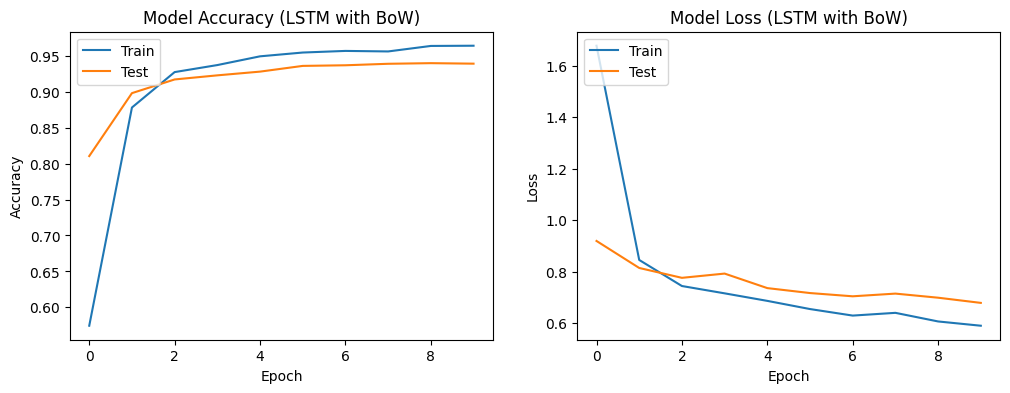

CPU times: user 10min 40s, sys: 31.2 s, total: 11min 11s
Wall time: 7min 13s


In [56]:
# @title LSTM
%%time
# Untuk Bag-of-Words, kita perlu mengubah matriks sparse menjadi array dense
# karena lapisan Embedding pada LSTM membutuhkan input array NumPy.
# Namun, perlu diingat bahwa ini bisa sangat memakan memori
# jika ukuran kosakata (max_features) dan jumlah data latih besar.

# Persiapan data untuk LSTM menggunakan Bag-of-Words
# Gunakan data hasil ekstraksi fitur Bag-of-Words (X_bow) dan label (y)
X_lstm_bow = X_bow # X_bow sudah di-fit dan transform sebelumnya
y_lstm_bow = y     # y sudah di-labeling sebelumnya

# Bagi data menjadi data latih dan data uji untuk LSTM
X_train_lstm_bow, X_test_lstm_bow, y_train_lstm_bow, y_test_lstm_bow = train_test_split(X_lstm_bow, y_lstm_bow, test_size=0.2, random_state=seed)

# Konversi matriks sparse Bag-of-Words ke array dense
# Ini adalah langkah kritis dan berpotensi memakan banyak memori
X_train_lstm_bow_dense = X_train_lstm_bow.toarray()
X_test_lstm_bow_dense = X_test_lstm_bow.toarray()

# Konversi label ke one-hot encoding
num_classes = len(df['label'].unique()) # Sesuaikan dengan jumlah kelas sentimen Anda
y_train_lstm_bow_one_hot = to_categorical(y_train_lstm_bow, num_classes=num_classes)
y_test_lstm_bow_one_hot = to_categorical(y_test_lstm_bow, num_classes=num_classes)

# Mendapatkan dimensi input untuk model LSTM
# Dimensi input adalah jumlah fitur dalam representasi Bag-of-Words
input_dim_bow = X_train_lstm_bow_dense.shape[1]

# Membuat model LSTM dengan input Bag-of-Words
# Perhatikan bahwa kita tidak menggunakan lapisan Embedding di sini
# karena input sudah dalam bentuk vektor numerik (Bag-of-Words).
# Kita bisa menggunakan lapisan Dense sebagai gantinya atau langsung ke LSTM
# jika input berbentuk 2D (batch_size, features). Untuk LSTM,
# kita perlu input 3D (batch_size, timesteps, features).
# Bag-of-Words biasanya 2D (batch_size, features).

# Ada dua pendekatan:
# 1. Menganggap setiap "fitur" BOW sebagai "timestep" (tidak umum dan mungkin tidak sesuai untuk data tekstual)
# 2. Menggunakan lapisan Dense setelah input untuk memproyeksikan fitur BOW ke ruang yang dapat diproses LSTM (lebih umum untuk data non-urutan yang diproses oleh LSTM)

# Pendekatan 2: Menggunakan Dense sebelum LSTM
model_bow = Sequential()
# Input shape adalah (jumlah_fitur,) karena Bag-of-Words adalah vektor fitur per sampel
model_bow.add(Dense(128, activation='relu', input_shape=(input_dim_bow,)))
model_bow.add(Dropout(0.2))
# Untuk memasukkan data dari Dense (2D) ke LSTM (3D), kita perlu reshape atau menggunakan RepeatVector (jika setiap timestep menerima input yang sama)
# Alternatif lain adalah menggunakan Conv1D atau Flatten/Reshape jika kita menganggap urutan fitur BOW
# Pendekatan yang lebih umum adalah menggunakan LSTM pada representasi sequence, bukan pada BOW dense vector.
# Jika Anda benar-benar ingin menggunakan BOW dengan LSTM, Anda mungkin perlu struktur yang berbeda
# atau mempertimbangkan mengapa LSTM (yang bagus untuk urutan) digunakan pada fitur non-urutan seperti BOW.

# Namun, jika maksud Anda adalah menggunakan Bag-of-Words sebagai input fitur langsung ke Dense layer
# sebelum masuk ke arsitektur mirip LSTM (misalnya, Dense -> ... -> Dense), itu bisa dilakukan.
# Tapi jika tujuannya menggunakan sifat sequence dari LSTM, BOW bukan representasi yang ideal.

# Mari kita buat model LSTM yang menerima input 3D.
# Jika kita harus menggunakan representasi BOW (2D) sebagai input untuk LSTM,
# cara paling sederhana adalah memperlakukannya sebagai sequence of length 1
# dengan feature dimension equal to the size of the vocabulary.
# Input shape akan menjadi (batch_size, 1, input_dim_bow)

# Reshape data BOW untuk input LSTM (batch_size, timesteps=1, features)
X_train_lstm_bow_reshaped = np.expand_dims(X_train_lstm_bow_dense, axis=1)
X_test_lstm_bow_reshaped = np.expand_dims(X_test_lstm_bow_dense, axis=1)

print(f"Shape data latih BOW setelah reshape: {X_train_lstm_bow_reshaped.shape}")
print(f"Shape data uji BOW setelah reshape: {X_test_lstm_bow_reshaped.shape}")


# Membuat model LSTM dengan input Bag-of-Words yang sudah di-reshape
model_bow_lstm = Sequential()
# Input shape: (timesteps, feature_dimension) -> (1, input_dim_bow)
model_bow_lstm.add(LSTM(128, return_sequences=False, input_shape=(1, input_dim_bow), kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.0001))) # return_sequences=False karena timesteps=1
model_bow_lstm.add(Dropout(0.4))
model_bow_lstm.add(Dense(64, activation='relu', bias_regularizer=regularizers.l2(0.0001)))
model_bow_lstm.add(Dropout(0.2))
model_bow_lstm.add(Dense(32, activation='relu', bias_regularizer=regularizers.l2(0.0001)))
model_bow_lstm.add(Dropout(0.2))
model_bow_lstm.add(Dense(num_classes, activation='softmax', activity_regularizer=regularizers.l2(0.0001))) # Output layer

# Kompilasi model
model_bow_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model_bow_lstm.summary()

# Melatih model
epochs = 10
batch_size = 200

history_bow_lstm = model_bow_lstm.fit(X_train_lstm_bow_reshaped, y_train_lstm_bow_one_hot,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      validation_data=(X_test_lstm_bow_reshaped, y_test_lstm_bow_one_hot))

# Evaluasi model
loss_bow_lstm, accuracy_bow_lstm = model_bow_lstm.evaluate(X_test_lstm_bow_reshaped, y_test_lstm_bow_one_hot, verbose=0)
print(f'LSTM with Bag-of-Words Accuracy on Test Data: {accuracy_bow_lstm*100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_bow_lstm.history['accuracy'])
plt.plot(history_bow_lstm.history['val_accuracy'])
plt.title('Model Accuracy (LSTM with BoW)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_bow_lstm.history['loss'])
plt.plot(history_bow_lstm.history['val_loss'])
plt.title('Model Loss (LSTM with BoW)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
